# 고급 데이터 시각화 (슬라이드 순서 재구성)

## 학습목표
- Seaborn 기본 그래프(막대·선·상자)에서 `hue`와 요약통계(`estimator`)를 활용해 **그룹 비교**를 정확히 수행한다.
- Bubble(산점도+크기), Mosaic(범주×범주), Heatmap(격자 매트릭스), Radar(프로필), Treemap(계층)을 **올바른 데이터 형태**로 그리고 해석한다.
- “무엇을 비교/설명하려는가?”에 맞춰 **그래프 선택·축 스케일·범례·팔레트**를 설계한다.

## 🌊 Seaborn 핵심 포인트

### 1️⃣ Seaborn의 개념
- **Matplotlib 기반**의 고급 시각화 라이브러리로, 복잡한 그래프를 **짧고 간결한 코드**로 표현할 수 있음  
- **Pandas 데이터프레임과 완벽하게 통합**되어, 별도의 변환 없이 바로 시각화 가능  
- **자동 통계 계산 기능**을 제공하여, 평균·중앙값·신뢰구간 등을 자동으로 시각화함  
- **전문적인 색상 팔레트**를 기본 제공하여, 시각적 일관성과 가독성을 높임  
- 복잡한 그룹 데이터(예: 성별·요일별 매출 차이 등)를 손쉽게 비교 가능  

---

### 2️⃣ Seaborn의 장점
- **간결함** : 짧은 구문으로 고품질 그래프 생성 가능  
- **자동화** : 통계적 요약(평균, 신뢰구간 등)을 자동으로 계산해 표시  
- **심미성** : 색상, 테마, 스타일이 일관되어 분석 결과의 설득력을 높임  
- **호환성** : Pandas, Numpy 등 다른 라이브러리와 자연스럽게 연결됨  
- **분석 중심 설계** : 단순한 시각화가 아니라, 데이터를 ‘비교·설명·해석’하는 데 초점을 둠  

---

### 3️⃣ 시각화를 통해 배울 수 있는 것
- **데이터의 중심 경향** : 어떤 그룹의 평균이 높은지 낮은지 한눈에 파악  
- **변동성(분산)** : 신뢰구간 또는 박스 범위를 통해 데이터의 일관성 확인  
- **패턴 탐색** : 시계열·범주형 데이터의 변화 추세나 계절성 파악  
- **이상치 탐지** : 극단적으로 크거나 작은 값이 어디서 발생하는지 시각적으로 확인  
- **그룹 간 차이 비교** : 범주형 변수(hue)를 통해 조건별 차이를 직관적으로 이해  

---

### 4️⃣ 실습에 사용할 내장 데이터 셋

#### ▪ tips (식당 영수증 데이터)
- **설명** : 손님이 지불한 총금액과 팁, 인원 수, 요일, 시간대 등을 포함한 표본 데이터  
- **학습 포인트**
  - 요일별·성별·시간대별 **매출 차이** 분석  
  - 팁 금액(`tip`)과 총 금액(`total_bill`)의 **상관관계** 파악  
  - **평균의 의미**와 표본 수의 차이에 따른 해석 연습  
  - **범주형 변수(hue)** 를 활용한 다중 비교  

#### ▪ flights (항공 승객 데이터)
- **설명** : 1949년부터 1960년까지의 월별 항공 승객 수 기록  
- **학습 포인트**
  - 연도별 승객 수 증가 추세(Trend) 분석  
  - 월별 **계절성(Seasonality)** 패턴 이해  
  - Heatmap과 Line plot을 통한 **시계열 시각화의 중요성** 학습  
  - 색상 농도를 통한 **데이터 강도(High–Low)** 개념 체득  

---

## 🟦 Part 1. Bar Plot — 범주형 데이터의 평균 비교

### 1️⃣ 개념 이해
- **Bar Plot(막대그래프)** 는 범주형 데이터의 **평균값이나 합계**를 막대의 길이로 나타내는 시각화 기법이다.  
- Seaborn의 Bar Plot은 단순히 ‘도수(count)’가 아니라, **특정 연산 결과(예: 평균, 중앙값)** 를 자동으로 계산하여 시각화한다.  
- 즉, 범주별로 데이터를 **요약(summary)** 하여 한눈에 비교하기에 적합한 도구이다.

---

### 2️⃣ 학습 목표
- **(1)** 범주형 변수(x축)와 수치형 변수(y축)의 관계를 시각적으로 표현할 수 있다.  
- **(2)** `hue` 개념을 통해 **이중 그룹 비교(예: 요일 × 성별)** 를 이해한다.  
- **(3)** 평균(Mean), 중앙값(Median) 등 **통계 요약값의 의미**를 시각적으로 해석할 수 있다.  
- **(4)** 막대의 높이, 색상, 패턴을 통해 **데이터의 패턴과 차이**를 해석할 수 있다.  

---

### 3️⃣ 그래프 해석 포인트
| 구분 | 의미 | 해석 방법 |
|------|------|------------|
| **막대 높이** | 각 범주의 평균값 | 값이 높을수록 평균이 크다는 뜻 |
| **색상 구분 (hue)** | 추가적인 범주 구분 | 성별, 지역, 시간대 등 조건별 차이 확인 |
| **에러바 (Error Bar)** | 신뢰구간(Confidence Interval) | 막대 높이의 불확실성을 시각적으로 표현 |
| **정렬 순서 (order)** | 카테고리 표시 순서 | 의미 있는 순서로 정렬 시 해석 용이 |
| **팔레트 (palette)** | 색상 테마 | 비교 대상을 시각적으로 구분하는 역할 |

---

### 4️⃣ 예시로 배우는 시각적 해석

#### ▪ 예시 1: 요일별 평균 결제 금액
- 각 요일(day)별 평균 결제 금액(total_bill)의 차이를 막대 높이로 확인할 수 있음  
- 막대가 높을수록 해당 요일의 평균 지출이 높다는 의미  
- 평균이 높다고 해서 “손님이 많았다”는 의미는 아님 — **평균 금액의 특성**임  

#### ▪ 예시 2: 요일 × 성별 비교
- 색상(hue)으로 성별(sex)을 구분하면, **같은 요일 내에서의 성별 차이**를 비교할 수 있음  
- 예를 들어, 특정 요일에 남성 손님의 평균 결제 금액이 높다면, 해당 그룹의 소비 패턴을 해석할 수 있음  
- **이중 비교(dual comparison)** 를 통해 데이터 속 숨은 구조를 파악할 수 있음  

---

### 5️⃣ Bar Plot이 유용한 분석 상황
- **그룹 간 평균 비교**: 예) 남학생 vs 여학생의 평균 성적 차이  
- **카테고리별 통계 요약**: 예) 지역별 평균 매출, 업종별 만족도  
- **이중 조건 분석**: 예) 요일×성별, 시간대×흡연 여부 등  
- **정책·전략 수립을 위한 비교형 시각화**: 어떤 집단이 더 크고, 어떤 요인이 차이를 만드는가를 파악

---

### 6️⃣ 주의할 점
- **표본 수가 적은 그룹**은 평균이 왜곡될 수 있음  
- **왜도(Skewness)** 가 큰 데이터의 경우 평균 대신 중앙값 시각화가 더 적절함  
- **hue**가 많아질수록 그래프가 복잡해져 **정보량 대비 가독성**이 떨어질 수 있음  
- **단위**를 명확히 표기하여 해석 혼란 방지 (예: $, %, 명 등)

---

In [ ]:
# ===============================================================
# 🎨 Part 1. Bar Plot — 범주별 평균 비교
# ===============================================================
# 🎯 학습 목표
# - 범주형(x) 변수별 평균값을 막대의 높이로 표현
# - 그룹 비교를 통해 데이터의 패턴을 시각적으로 이해
# ===============================================================

# 1️⃣ 라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 2️⃣ 내장 데이터 셋 불러오기
#    - tips: 식당 영수증 데이터
#    - 주요 컬럼:
#       total_bill (총지불금액)
#       tip (팁 금액)
#       sex (성별)
#       smoker (흡연여부)
#       day (요일)
#       time (Lunch/Dinner)
#       size (동석 인원수)
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# 3️⃣ 그래프 테마 설정
sns.set_theme(style="whitegrid", rc={"figure.figsize": (6, 4)})
sns.set_palette('hls', 4)

/tmp/ipython-input-1465367646.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


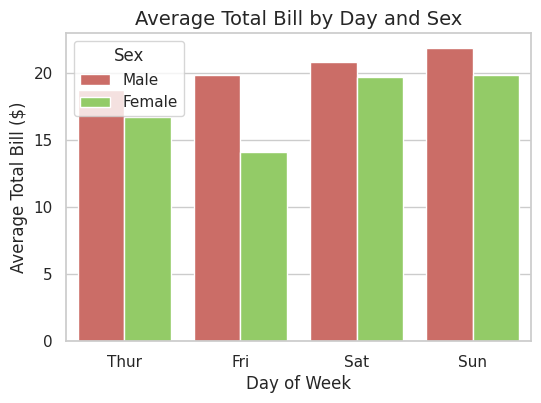

In [ ]:
# 4️⃣ 요일별 평균 지불금액 비교
sns.barplot(
    data=df,                 # 사용할 데이터프레임
    x='day',                 # x축: 요일
    y='total_bill',          # y축: 총 지불금액
    estimator='mean',        # 평균값 계산
    hue='sex',               # 색상 구분 기준 (성별)
    ci=None                  # 신뢰구간(에러바) 제거
)

# 5️⃣ 그래프 꾸미기
plt.title('Average Total Bill by Day and Sex', fontsize=14)
plt.xlabel('Day of Week')
plt.ylabel('Average Total Bill ($)')
plt.legend(title='Sex')
plt.show()

# 🎓 해석 포인트
# - 막대의 높이 = 평균 총 지불금액
# - hue='sex' → 남성과 여성의 소비 패턴 비교
# - ci=None → 그래프 단순화, 평균값만 명확히 표시
# - 전체적으로 주말(Sat, Sun)일수록 결제 금액이 높은 경향 확인 가능

## 📈 Part 2. Line Plot — 변화와 추세(Trend)의 시각화

### 1️⃣ 개념 이해
- **Line Plot(선그래프)** 는 시간이나 순서를 가진 데이터의 **변화 추세(Trend)** 를 나타내는 시각화 기법이다.  
- 각 점(Point)은 특정 시점의 값을 나타내며, 점들을 선(Line)으로 연결하여 **증가·감소의 방향과 속도**를 한눈에 보여준다.  
- Seaborn의 Line Plot은 단순한 꺾은선 그래프를 넘어, **그룹별 추세 비교**와 **시계열 패턴 해석**을 돕는다.

---

### 2️⃣ 학습 목표
- **(1)** 시계열(time series) 데이터의 **변화 흐름**을 시각적으로 해석할 수 있다.  
- **(2)** `year`, `month`, `date` 등 순서형 변수의 의미를 이해하고, **추세와 패턴**을 구분할 수 있다.  
- **(3)** `hue`를 활용하여 **그룹별 변화 양상**을 비교할 수 있다.  
- **(4)** Line Plot을 통해 **계절성(seasonality)** 과 **전반적 추세(global trend)** 를 구분할 수 있다.  

---

### 3️⃣ 그래프 해석 포인트
| 구분 | 의미 | 해석 방법 |
|------|------|------------|
| **선(Line)의 기울기** | 변화의 속도(Slope) | 가파를수록 변화가 빠름 |
| **선의 방향** | 증가/감소 추세 | 위로 향하면 증가, 아래로 향하면 감소 |
| **색상(hue)** | 그룹 구분 | 연도별·월별·카테고리별 비교 가능 |
| **패턴의 반복성** | 계절성 또는 주기성 | 특정 구간마다 유사한 움직임이 반복되는가 확인 |
| **진동 폭(Amplitude)** | 변동성의 크기 | 값의 변동 폭이 클수록 불안정한 패턴 |

---

### 4️⃣ 예시로 배우는 시각적 해석

#### ▪ 예시 1: 연도별 항공 승객 수 변화
- 한 해의 승객 수가 점진적으로 증가하는 추세를 관찰할 수 있음  
- 전반적으로 우상향한다면 **항공 수요가 꾸준히 증가**하고 있음을 의미  
- 일시적인 하락 구간은 경제나 계절 요인과 연관될 수 있음  

#### ▪ 예시 2: 월별 추세를 색상(hue)으로 구분
- 각 월(month)에 대한 색상을 달리하면, **계절별 패턴(Seasonal pattern)** 을 비교할 수 있음  
- 예를 들어, 여름(July, August)에 승객 수가 꾸준히 높게 나타난다면 **여름 성수기**를 의미  
- `hue`를 통해 한 그래프 안에서 여러 월의 **중첩된 추세 비교**가 가능  

---

### 5️⃣ Line Plot이 유용한 분석 상황
- **시간에 따른 변화 탐색**: 예) 월별 매출, 연도별 생산량, 일별 평균 기온  
- **트렌드 비교**: 예) 제품 A vs 제품 B의 판매 추이  
- **계절성 분석**: 예) 월별 승객 수, 계절별 에너지 소비량  
- **변동성 파악**: 예) 주식 가격, 기온 변화, 환율 등  

---

### 6️⃣ 시각화에서 배울 수 있는 핵심 통찰
1. **시간의 흐름을 한눈에 본다** — 숫자가 아닌 **패턴으로 이해하는 능력**  
2. **상대적 비교가 가능하다** — 같은 축에서 여러 그룹의 변화를 동시에 관찰  
3. **이상 시점(특이점)을 탐지한다** — 급격한 증가·감소 구간의 원인을 분석  
4. **미래 예측의 기초가 된다** — 과거 패턴이 미래를 예측하는 단서가 됨  

---

### 7️⃣ 해석의 주의점
- **시간 단위의 간격**을 일정하게 유지해야 왜곡이 없음  
- **데이터 간격이 불균등**할 경우, 선의 길이만 보고 결론을 내리지 않기  
- **과도한 그룹 수(hue)** 는 그래프를 복잡하게 만들어 해석이 어려워짐  
- **축 스케일의 범위**를 적절히 조정하지 않으면 변동이 과소/과대 표현될 수 있음  

---

In [ ]:
# ===============================================================
# 📈 Part 2. Line Plot — 시간에 따른 추세(Trend)
# ===============================================================
# 🎯 학습 목표
# - 시간 또는 순서형 데이터의 변화를 선(Line)으로 표현
# - 선의 방향, 기울기, 색상을 통해 추세(Trend)와 주기성(Seasonality)을 해석
# ===============================================================

# 1️⃣ 라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 2️⃣ 내장 데이터 셋 불러오기
#    - flights: 연도별·월별 항공 승객 수 데이터
#    - 주요 컬럼:
#       year (연도)
#       month (월)
#       passengers (해당 월의 항공 승객 수)
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
# 3️⃣ 그래프 테마 설정
sns.set_theme(style="whitegrid", rc={"figure.figsize": (8, 5)})
sns.set_palette('husl', 12)  # 12개월을 표현할 팔레트 지정

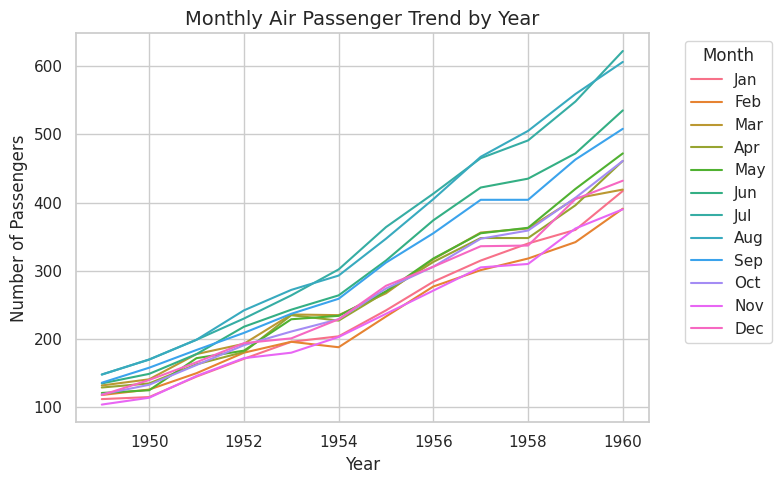

In [ ]:
# 4️⃣ 연도별 월별 항공 승객 수 추세 시각화
sns.lineplot(
    data=df,           # 사용할 데이터프레임
    x='year',          # x축: 연도
    y='passengers',    # y축: 승객 수
    hue='month'        # 색상 구분: 월별 구분 (Jan~Dec)
)

# 5️⃣ 그래프 꾸미기
plt.title('Monthly Air Passenger Trend by Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 🎓 해석 포인트
# - 선의 기울기(↗) → 항공 승객 수의 증가 추세(Trend)
# - 월별 색상 차이 → 계절적 변동(Seasonality)
# - 연도가 증가할수록 모든 월에서 승객 수가 상승하는 장기적 성장 패턴 확인 가능

## 📦 Part 3. Box Plot — 데이터의 분포와 변동성(Variability)

### 1️⃣ 개념 이해
- **Box Plot(상자그림)**은 데이터의 **분포(Distribution)** 를 시각적으로 요약하여 보여주는 그래프이다.  
- 평균(mean)보다 **중앙값(median)** 중심의 통계 요약을 사용하며,  
  데이터가 어떻게 퍼져 있는지(변동성), 어디에 집중되어 있는지(중심),  
  그리고 이상치(outlier)가 존재하는지를 한눈에 파악할 수 있다.  
- 데이터의 “흐름”보다는 “형태”를 보여주는 그래프이다.

---

### 2️⃣ 학습 목표
- **(1)** Box Plot의 구성요소(최솟값, 1사분위, 중앙값, 3사분위, 최댓값)를 이해한다.  
- **(2)** 데이터를 “중앙과 퍼짐”으로 요약하는 통계적 사고를 배운다.  
- **(3)** 그룹별 분포 차이를 시각적으로 비교할 수 있다.  
- **(4)** 이상치(outlier)가 무엇을 의미하는지 해석할 수 있다.

---

### 3️⃣ 그래프 구성요소
| 구성요소 | 의미 | 해석 포인트 |
|-----------|------|--------------|
| **Box (상자)** | 전체 데이터의 가운데 50% 구간 (IQR: 3사분위–1사분위) | 상자의 높이가 크면 데이터의 변동이 큼 |
| **Line (중앙선)** | 중앙값 (Median) | 분포의 중심 위치 |
| **Whisker (수염)** | 데이터의 전체 범위 | 수염이 길면 극단값이 존재하거나 변동성이 큼 |
| **Dot (이상치)** | 평균적 범위를 벗어난 데이터 | 데이터 패턴을 깨뜨리는 예외적 사례 |
| **Color / Hue** | 그룹 구분 | 범주별 분포 차이 비교 가능 |

---

### 4️⃣ Box Plot으로 볼 수 있는 정보
1. **데이터의 중심 위치** — 중앙값(Median)  
2. **데이터의 퍼짐 정도** — IQR(사분위 범위)  
3. **데이터의 비대칭성(Skewness)** — 상자 내 선의 위치로 판단  
4. **이상치의 존재 여부** — 점(Dot)으로 표시  
5. **그룹 간 분포 비교** — 동일한 축에서 여러 집단의 변동성 비교 가능  

---

### 5️⃣ 예시로 배우는 시각적 해석

#### ▪ 예시 1: 월별 기온 분포
- 상자의 높이가 큰 달은 **기온 변동이 심함**을 의미  
- 중앙선이 상자 하단에 치우쳐 있으면 **낮은 값이 많고, 일부 높은 값이 존재**  
- 이상치 점이 많다면, 특정 시점의 **비정상적 기온(예: 폭염, 한파)** 을 의미  

#### ▪ 예시 2: 그룹 간 비교 (예: 남녀 성적 분포)
- 상자의 중앙선이 높은 그룹은 **중앙값이 더 큼 → 전반적으로 성적이 높음**  
- 상자 높이(폭)가 작은 그룹은 **점수가 일정하게 분포 → 변동성이 적음**  
- 이상치가 많은 경우, **특이한 학습 패턴이나 표본 수 부족**을 의심  

---

### 6️⃣ Box Plot이 유용한 분석 상황
- **데이터 분포 비교**: 예) 월별 매출, 지역별 소득, 반별 시험 성적  
- **이상치 탐지**: 예) 품질 검사에서의 불량률, 기후 데이터의 극단값  
- **데이터 안정성 분석**: 예) 생산 과정의 균질성, 반복 실험의 일관성  
- **비대칭성 분석**: 평균과 중앙값이 다를 때의 패턴 해석  

---

### 7️⃣ 해석의 주의점
- **평균(mean)** 과 **중앙값(median)** 은 다를 수 있으며, 항상 평균이 대표값이 되지 않는다.  
- **이상치(outlier)** 는 반드시 오류값이 아닐 수 있다. 의미 있는 현상일 수도 있음.  
- **표본 수가 적을 경우**, 상자 형태가 왜곡되어 실제 분포를 제대로 반영하지 못할 수 있다.  
- **범주형 그룹이 많을수록**, 축이 복잡해지고 해석이 어려워질 수 있다.  

---

In [ ]:
# ===============================================================
# 📦 Part 3. Box Plot — 데이터의 분포와 이상치 시각화
# ===============================================================
# 🎯 학습 목표
# - 수치형 데이터의 분포를 상자(Box) 형태로 표현
# - 중앙값(Median), 사분위수(IQR), 이상치(Outlier)를 시각적으로 해석
# ===============================================================

# 1️⃣ 라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 2️⃣ 내장 데이터 셋 불러오기
#    - tips: 식당 영수증 데이터
#    - 주요 컬럼:
#       total_bill (총 지불금액)
#       tip (팁 금액)
#       sex (성별)
#       day (요일)
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# 3️⃣ 그래프 테마 설정
sns.set_theme(style="whitegrid", rc={"figure.figsize": (6, 4)})

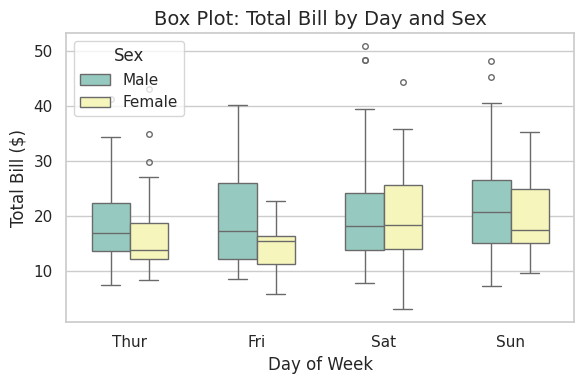

In [ ]:
# 4️⃣ Box Plot 작성
sns.boxplot(
    data=df,                 # 사용할 데이터프레임
    x='day',                 # x축: 요일별 구분
    y='total_bill',          # y축: 총 지불금액
    hue='sex',               # 색상 기준: 성별 구분
    palette='Set3',          # 색상 팔레트
    width=0.6,               # 상자 두께
    fliersize=4              # 이상치 점 크기
)

# 5️⃣ 그래프 꾸미기
plt.title('Box Plot: Total Bill by Day and Sex', fontsize=14)
plt.xlabel('Day of Week')
plt.ylabel('Total Bill ($)')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

# 🎓 해석 포인트
# - 중앙선(Middle Line): 중앙값(Median)
# - 박스(Box): 1사분위(Q1) ~ 3사분위(Q3) 범위 (데이터의 중간 50%)
# - 점(●): 이상치(Outlier)
# - 남성/여성 간 지불금액 분포 차이 확인 가능
# - 주말(Sat, Sun)일수록 금액 분포가 높고 변동성(Variability)이 큼

## 🟠 Part 4. Bubble Chart — 다변수(3차원) 시각화

### 1️⃣ 개념 이해
- **Bubble Chart(버블 차트)** 는 **산점도(Scatter Plot)** 의 확장형으로,  
  각 점(Point)의 **크기(Size)** 와 **색상(Color)** 을 추가하여  
  **세 개 이상의 변수**를 동시에 표현할 수 있는 시각화 기법이다.  
- 좌표평면 위의 점 하나가 단순한 데이터가 아니라,  
  **복합적 정보(예: 인구·범죄율·소득 등)** 를 함축적으로 표현한다.  

---

### 2️⃣ 학습 목표
- **(1)** 산점도의 기본 구조(x축·y축)의 의미를 이해한다.  
- **(2)** 점의 크기(size)와 색상(hue)가 **추가 정보를 전달**하는 방식을 학습한다.  
- **(3)** 여러 변수를 한눈에 볼 수 있도록 **다변수 관계를 시각적으로 통합**한다.  
- **(4)** 데이터 해석 시, **위치·크기·색의 조합이 어떤 의미를 가지는지** 파악한다.  

---

### 3️⃣ 그래프 구성요소
| 구성요소 | 의미 | 해석 포인트 |
|-----------|------|--------------|
| **X축 (Horizontal Axis)** | 첫 번째 수치형 변수 | 독립변수 또는 비교 기준 |
| **Y축 (Vertical Axis)** | 두 번째 수치형 변수 | 종속변수 또는 성과 지표 |
| **Bubble Size (크기)** | 세 번째 변수의 상대적 크기 | 값이 클수록 원이 큼 |
| **Bubble Color (색상)** | 네 번째 범주형 변수(선택) | 그룹이나 지역 등 구분 |
| **Opacity (투명도)** | 중첩된 데이터 구분용 시각적 장치 | 겹침이 많을수록 투명도 필요 |

---

### 4️⃣ 예시로 배우는 시각적 해석

#### ▪ 예시 1: 주(州)별 범죄율 비교
- X축: 살인율(Murder), Y축: 절도율(Burglary), 버블 크기: 인구(Population)  
- 버블이 오른쪽 상단에 크고 짙게 위치 → **인구가 많고, 범죄율이 높은 지역**  
- 왼쪽 하단에 작은 버블 → **인구가 적고, 범죄율이 낮은 지역**  
- 버블의 색이 다르면 지역군(Region)에 따라 차이를 해석 가능  

#### ▪ 예시 2: 국가별 경제 비교
- X축: 1인당 GDP, Y축: 평균 수명, 버블 크기: 인구수, 색상: 대륙(Continent)  
- 오른쪽 위로 갈수록 **경제력과 삶의 질이 높은 국가**  
- 버블 크기가 크면 인구 규모가 크다는 의미  
- 색으로 구분된 대륙별 차이를 통해 **지리적·경제적 불균형**을 시각적으로 이해 가능  

---

### 5️⃣ Bubble Chart가 유용한 분석 상황
- **경제·사회지표 비교**: GDP, 인구, 행복지수 등 복합 변수 간의 관계  
- **비즈니스 인사이트**: 시장 규모 vs 매출 vs 성장률의 시각화  
- **환경 데이터 분석**: 오염도, 인구밀도, 산업활동량 등의 연관성 파악  
- **교육·보건 통계**: 학업성취도, 교사 수, 학생 수, 학교 수 등  
- **스포츠 데이터**: 경기 수, 승률, 점수차 등을 한 그래프에서 표현  

---

### 6️⃣ 해석의 주의점
- **크기(면적)** 는 시각적으로 부각되기 쉬우므로, **단위 차이**를 반드시 고려해야 한다.  
- 버블이 겹칠 경우, **투명도(alpha)** 나 **윤곽선(edge)** 을 활용해 시각적 혼란을 줄여야 한다.  
- 데이터 값의 **비율적 차이(예: 10 vs 100)** 는 면적이 아닌 반지름 제곱으로 표현되므로 왜곡에 주의해야 한다.  
- **크기가 큰 버블**이 반드시 “좋은” 의미는 아니다 — 맥락에 따라 긍정적 또는 부정적 지표일 수 있다.  

---

In [ ]:
# ===============================================================
# 🟠 Part 4. Bubble Chart — 다변수(3차원) 관계 시각화
# ===============================================================
# 🎯 학습 목표
# - x축, y축, 버블 크기(size), 색상(hue)을 이용해
#   3개 이상의 변수를 동시에 표현
# - 데이터의 규모(Scale)와 관계(Relationship)를 시각적으로 해석
# ===============================================================

# 1️⃣ 라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# 2️⃣ 예시용 데이터프레임 생성
#    (실제 버블 차트는 다변수 구조를 갖는 데이터에 적합)
df = pd.DataFrame({
    'murder': [5.7, 3.2, 9.1, 7.5, 11.0],     # 살인율
    'burglary': [400, 250, 600, 500, 800],    # 절도율
    'population': [3.1, 2.2, 5.5, 4.3, 7.0],  # 인구(백만 단위)
    'state': ['A', 'B', 'C', 'D', 'E']        # 주 이름
})
df

,murder,burglary,population,state
0,5.7,400,3.1,A
1,3.2,250,2.2,B
2,9.1,600,5.5,C
3,7.5,500,4.3,D
4,11.0,800,7.0,E


In [ ]:
# 3️⃣ 그래프 스타일 설정
sns.set_theme(rc={'figure.figsize': (7, 6)})

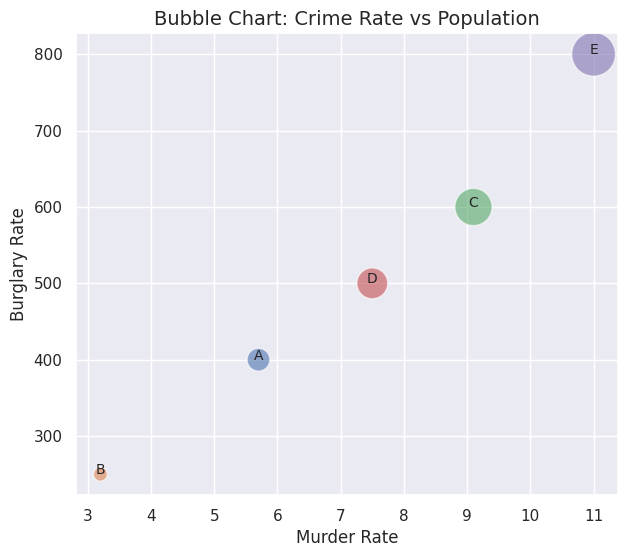

In [ ]:
# 4️⃣ Bubble Chart 작성
sns.scatterplot(
    data=df,
    x='murder',                # x축: 살인율
    y='burglary',              # y축: 절도율
    size='population',         # 버블 크기: 인구 규모
    sizes=(100, 1000),         # 버블 최소/최대 크기 지정
    hue='state',               # 색상: 주(state)
    alpha=0.6,                 # 투명도
    legend=False               # 범례 제거
)

# 5️⃣ 그래프 꾸미기
plt.title('Bubble Chart: Crime Rate vs Population', fontsize=14)
plt.xlabel('Murder Rate')
plt.ylabel('Burglary Rate')

# 6️⃣ 각 버블에 주 이름 표시
for i in range(df.shape[0]):
    plt.text(
        x=df.murder[i],
        y=df.burglary[i],
        s=df.state[i],
        horizontalalignment='center',
        size='small'
    )

plt.show()

# 🎓 해석 포인트
# - (x, y): 두 변수 간의 관계 (예: 살인율 vs 절도율)
# - size: 인구 규모 → 크기가 클수록 인구 많음
# - hue: 색상으로 그룹 구분 (주 단위)
# - 하나의 점이 ‘여러 변수’를 동시에 표현하므로
#   다변량 데이터의 복합적 관계를 직관적으로 탐색 가능

In [ ]:
df

## 🧩 Part 5. Mosaic Plot — 범주형 변수 간의 관계 시각화

### 1️⃣ 개념 이해
- **Mosaic Plot(모자이크 차트)** 는 **두 개 이상의 범주형 변수** 간의 관계를  
  **면적(Area)의 비율**로 시각화하는 그래프이다.  
- 각 타일(Tile)의 크기가 빈도(Frequency) 또는 비율(Proportion)을 나타내며,  
  **데이터의 구조적 분포와 그룹 간 차이**를 한눈에 파악할 수 있다.  
- 예를 들어, “성별(sex) × 생존여부(survived)” 관계를 보면  
  남성과 여성의 비율뿐 아니라, 각 그룹 내에서 생존과 사망의 비중까지 동시에 확인할 수 있다.

---

### 2️⃣ 학습 목표
- **(1)** 범주형 변수 간의 관계를 ‘비율과 면적’으로 해석하는 방법을 배운다.  
- **(2)** 교차분할표(Crosstab)의 개념을 시각적으로 이해한다.  
- **(3)** 색상과 면적을 통해 **상대적 비율과 구조적 패턴**을 파악한다.  
- **(4)** 단순 빈도(count)가 아니라, **비율(proportion)** 중심의 해석 감각을 기른다.  

---

### 3️⃣ 그래프 구성요소
| 구성요소 | 의미 | 해석 포인트 |
|-----------|------|--------------|
| **Tile(타일)** | 각 범주 조합의 비율 | 넓을수록 해당 조합의 빈도가 높음 |
| **Color(색상)** | 두 번째 변수의 범주 구분 | 색 대비로 그룹 간 차이를 시각적으로 표현 |
| **X축 분할** | 첫 번째 범주의 비중 | 전체 집단 내 비율 구조 확인 |
| **Y축 분할** | 두 번째 변수의 세부 비율 | 각 그룹 내부의 구성 차이 비교 |
| **Label(라벨)** | 각 구간 이름 표시 | 해석을 위한 텍스트 보조 요소 |

---

### 4️⃣ 예시로 배우는 시각적 해석

#### ▪ 예시 1: 타이타닉 생존 분석
- **X축**: 성별(Sex), **Y축**: 생존여부(Survived)  
- 남성 구간이 여성보다 넓다면, 전체 승객 중 남성이 더 많음을 의미  
- 각 구간 안의 색 비율이 다르다면,  
  예를 들어 여성 구간에서 ‘생존(Survived)’ 색이 더 넓다면  
  **여성의 생존률이 더 높았음**을 직관적으로 해석할 수 있다.  

#### ▪ 예시 2: 지역 × 상품 구매 여부
- **X축**: 지역(Region), **Y축**: 구매 여부(Purchase)  
- 특정 지역의 구매 타일이 두드러지게 넓다면,  
  해당 지역이 **핵심 시장(High-demand region)** 임을 의미  
- 반대로 어떤 지역은 ‘비구매’ 비율이 높다면, **소비 패턴의 지역적 차이**를 해석할 수 있다.  

---

### 5️⃣ Mosaic Plot이 유용한 분석 상황
- **사회조사 데이터**: 성별 × 직업군, 연령대 × 소비유형  
- **마케팅 분석**: 고객군 × 구매여부, 지역 × 브랜드 선호  
- **교육 통계**: 학년 × 성취도, 전공 × 진로 선택  
- **보건·의료 데이터**: 성별 × 질병 발생 여부, 흡연 여부 × 건강 상태  
- **설문조사 요약**: 문항 간 교차 관계 시각화  

---

### 6️⃣ 해석의 주의점
- 면적이 작은 타일은 **표본 수가 적어 신뢰도가 낮을 수 있음**  
- 색상은 상대적이므로, **명도 대비**를 잘못 설정하면 왜곡된 인상을 줄 수 있음  
- 변수의 순서를 바꾸면 그래프 구조가 달라질 수 있으므로  
  **해석 순서(기준 변수)** 를 명확히 해야 함  
- 비율이 아닌 **절댓값 데이터**를 넣으면 전체 스케일이 왜곡될 수 있음  

---

In [ ]:
# ===============================================================
# 🧩 Part 5. Mosaic Plot — 범주형 변수 간 비율 관계 시각화
# ===============================================================
# 🎯 학습 목표
# - 두 개 이상의 범주형 변수 간의 관계를 면적(Area) 비율로 표현
# - 각 범주 조합의 상대적 크기(비율)를 시각적으로 비교
# ===============================================================

# 1️⃣ 라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# 폰트 및 마이너스 표시 설정 (Colab 호환)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# 2️⃣ 내장 데이터 셋 불러오기
#    - titanic: 승객 생존 데이터
#    - 주요 컬럼:
#       survived (생존 여부: 0=사망, 1=생존)
#       sex (성별)
#       class (선실 등급)
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 3️⃣ 데이터 가독성을 위한 값 치환
df = df.replace({'survived': {0: 'Dead', 1: 'Survived'}})
df = df.replace({'sex': {'male': 'Male', 'female': 'Female'}})

In [ ]:
# 4️⃣ 모자이크 플롯 색상 함수 정의
def props(key):
    # key는 ('Male', 'Survived') 형태의 튜플로 전달됨
    return {'color': 'lightgreen' if 'Survived' in key else 'yellow'}

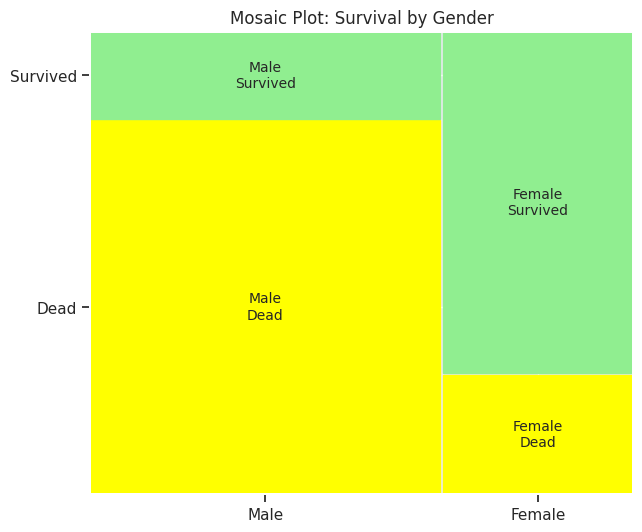

In [ ]:
# 5️⃣ Mosaic Plot 시각화
mosaic(
    data=df,                     # 사용할 데이터
    index=['sex', 'survived'],   # 계층 구조 (성별 → 생존여부)
    properties=props,            # 색상 설정 함수
    title='Mosaic Plot: Survival by Gender'
)
plt.show()

# 🎓 해석 포인트
# - x축 방향: 첫 번째 변수(성별)
# - 각 성별 구역 내부의 타일 크기: 생존/사망 비율
# - 면적이 넓을수록 해당 조합의 빈도가 높음
# - 여성 그룹의 초록색 타일(생존)이 넓다면 → 여성 생존률이 상대적으로 높음
# - Mosaic Plot은 교차분석표(Crosstab)를 시각화한 형태

## 🌡️ Part 6. Heatmap — 패턴과 강도(Intensity)의 시각화

### 1️⃣ 개념 이해
- **Heatmap(히트맵)** 은 데이터의 값을 **색의 농도(Color Intensity)** 로 표현하는 시각화 기법이다.  
- 숫자 대신 색상을 사용하여 **값의 크기, 패턴, 변화 추세**를 한눈에 파악할 수 있다.  
- 특히 **이중 축 구조(행 × 열)** 의 데이터를 시각화할 때 유용하며,  
  시간·지역·조건 등의 **복합적 관계를 요약**하는 데 탁월하다.

---

### 2️⃣ 학습 목표
- **(1)** 수치 데이터의 크기를 색상으로 인식하는 원리를 이해한다.  
- **(2)** 행과 열의 구조적 관계를 시각적으로 해석할 수 있다.  
- **(3)** 색상 농도를 통해 **패턴과 추세**를 빠르게 식별한다.  
- **(4)** 데이터를 피벗(pivot) 형태로 변환해 **2차원 정보 구조**를 익힌다.

---

### 3️⃣ 그래프 구성요소
| 구성요소 | 의미 | 해석 포인트 |
|-----------|------|--------------|
| **행(Row)** | 첫 번째 기준(예: 월, 지역) | 세로 방향으로 비교되는 구분 기준 |
| **열(Column)** | 두 번째 기준(예: 연도, 제품군) | 가로 방향의 시계열 또는 분류 기준 |
| **색상(Color)** | 수치 값의 크기(Intensity) | 진할수록 크거나 높음을 의미 |
| **색상 범례(Colorbar)** | 색상과 수치의 대응 관계 | 색의 의미를 명확히 인식 |
| **주요 패턴(Cluster)** | 유사한 색상이 모인 영역 | 공통된 특징이나 경향을 의미 |

---

### 4️⃣ 예시로 배우는 시각적 해석

#### ▪ 예시 1: 항공 승객 수의 월별 변화
- **행** = 월(Month), **열** = 연도(Year), **색상** = 평균 승객 수(Passengers)  
- 위쪽 행(겨울)보다 아래쪽 행(여름)의 색이 진하다면, **여름에 승객이 많음**을 의미  
- 오른쪽으로 갈수록 색이 전반적으로 진해진다면, **연도별 성장 추세**를 의미  
- 즉, Heatmap은 **계절성(Seasonality)** 과 **추세(Trend)** 를 동시에 표현할 수 있는 그래프이다.  

#### ▪ 예시 2: 과목별 학생 성취도
- **행** = 학생, **열** = 과목, **색상** = 점수  
- 색이 밝을수록 점수가 높으므로, 한 행 전체가 밝은 학생은 전반적 성취도가 높음  
- 한 열만 어두운 경우, 특정 과목에서의 약점을 시각적으로 파악 가능  

---

### 5️⃣ Heatmap이 유용한 분석 상황
- **시간 × 변수**: 월별·연도별 변화 (예: 매출, 이용량, 기온 등)  
- **지역 × 항목**: 지역별 지표 비교 (예: 교육 수준, 고용률, 환경 지수 등)  
- **제품 × 고객군**: 상품별 구매 패턴, 세그먼트별 선호도  
- **학생 × 과목**: 개별 학습 패턴 분석, 성취도 시각화  
- **센서 데이터**: 시간대별 온도·습도·소음 등 물리적 환경 변화 탐색  

---

### 6️⃣ 해석의 주의점
- **색상 팔레트(Color Palette)** 선택이 해석 방향을 바꿀 수 있음  
  - 예: ‘높음=진한색’ vs ‘낮음=진한색’ 혼동 주의  
- **색상 범위(Scale Range)** 는 모든 값의 상대적 의미를 결정함  
  - 전체 스케일을 동일하게 유지해야 공정한 비교 가능  
- **결측치(NaN)** 가 있으면 색상이 비거나 왜곡될 수 있음 → 사전 확인 필요  
- **시각적 착시**로 인한 해석 오류 주의 — 색상 대비보다 **상대 패턴**에 집중해야 함  

---

In [ ]:
# ===============================================================
# 🌡️ Part 6. Heatmap — 패턴과 강도(Intensity) 시각화
# ===============================================================
# 🎯 학습 목표
# - 2차원 데이터(행×열)의 값을 색상으로 표현
# - 색의 진하기를 통해 값의 크기(강도)를 직관적으로 비교
# - 결측치(NaN) 존재 시 데이터 품질 점검에 활용
# ===============================================================

# 1️⃣ 라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# 2️⃣ 내장 데이터 셋 불러오기
#    - flights: 1949~1960년 항공 승객 수 데이터
#    - 주요 컬럼:
#       year (연도)
#       month (월)
#       passengers (월별 탑승객 수)
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
# 3️⃣ 일부 데이터 결측 처리 (1951년 결측치로 설정)
flights.loc[flights['year'] == 1951, 'passengers'] = None

In [ ]:
# 4️⃣ pivot 사용 (행=month, 열=year, 값=passengers)
#    → 결측치가 유지되도록 pivot_table이 아닌 pivot 사용
pivot_missing = flights.pivot(
    index='month',
    columns='year',
    values='passengers'
)

In [ ]:
# 5️⃣ 그래프 스타일 설정
sns.set_theme(style="white", rc={"figure.figsize": (8, 6)})

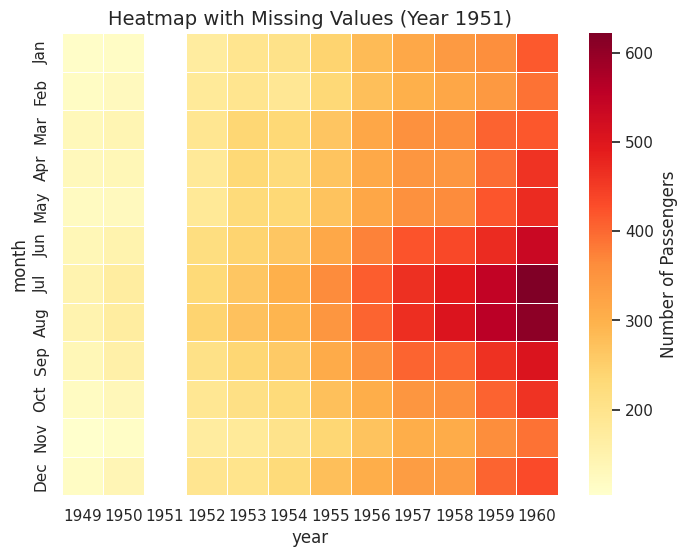

In [ ]:
# 6️⃣ Heatmap 작성 (mask 옵션으로 결측치 시각화)
sns.heatmap(
    data=pivot_missing,
    cmap='YlOrRd',                 # 노랑~빨강 색상 팔레트
    linewidths=0.5,                # 셀 구분선
    mask=pivot_missing.isna(),     # 결측치는 표시하지 않음 (하얗게 처리)
    cbar_kws={'label': 'Number of Passengers'}  # 컬러바 라벨
)

plt.show()

# 🎓 해석 포인트
# - 색이 진할수록 값(승객 수)이 많음을 의미
# - 1951년 열 전체가 하얗게 비어 있음 → 결측치 시각적으로 확인 가능
# - 월(month) 축을 따라 계절성(Seasonality), 연도(year) 축을 따라 추세(Trend) 관찰 가능
# - 데이터의 결측 구간이 명확히 드러나므로, 사전 전처리 필요성을 직관적으로 인식할 수 있음

## 🕸️ Part 7. Radar Chart — 다변량(프로필형) 비교 시각화

### 1️⃣ 개념 이해
- **Radar Chart(레이더 차트)** 는 여러 변수(지표)를  
  **다각형 형태로 동시에 표현하는 시각화 기법**이다.  
- 각 축(Axis)은 하나의 변수(특성)를 나타내며,  
  점(Point)을 연결한 다각형의 모양을 통해 **데이터의 전반적 균형과 패턴**을 확인할 수 있다.  
- 여러 개체(학생, 지역, 상품 등)를 한 그래프에 겹쳐서 표시하면,  
  서로의 **강점과 약점, 균형의 차이**를 직관적으로 비교할 수 있다.  

---

### 2️⃣ 학습 목표
- **(1)** 다차원 데이터를 2차원 평면에서 시각적으로 표현하는 방법을 이해한다.  
- **(2)** 각 변수의 상대적 크기와 균형을 시각적으로 해석할 수 있다.  
- **(3)** 여러 대상(학생, 제품, 도시 등)의 **다변량 비교 능력**을 기른다.  
- **(4)** 시각화가 단순 수치 비교보다 **종합적 평가**에 유리함을 체득한다.  

---

### 3️⃣ 그래프 구성요소
| 구성요소 | 의미 | 해석 포인트 |
|-----------|------|--------------|
| **축(Axis)** | 하나의 변수(지표) | 중심에서 바깥쪽으로 값이 커짐 |
| **점(Point)** | 변수의 실제 값 | 지표별 수준 |
| **다각형(Polygon)** | 모든 지표의 연결 형태 | 균형·강점·약점을 시각적으로 표현 |
| **색상(Color)** | 비교 대상 구분 | 개체별 프로필 차이 강조 |
| **범례(Legend)** | 다각형의 주체 표시 | 대상 이름 또는 그룹명 |

---

### 4️⃣ 예시로 배우는 시각적 해석

#### ▪ 예시 1: 학생 성적 비교
- 각 축: 국어(Kor), 영어(Eng), 수학(Math), 과학(Sci), 체육(PE)  
- 한 학생의 다각형이 전체적으로 크면 **전과목이 고르게 우수**  
- 특정 축이 튀어나와 있으면 **강점(subject strength)**,  
  반대로 움푹 들어간 축은 **약점(subject weakness)** 을 의미  
- 평균 프로필과 개인 프로필을 함께 그리면 **균형 비교**가 가능  

#### ▪ 예시 2: 제품 성능 비교
- 축: 가격, 내구성, 사용성, 디자인, 브랜드 인지도 등  
- 한 제품이 특정 축에서 두드러진다면, 그 부분이 **경쟁 우위(competitive advantage)**  
- 전체 면적이 큰 제품일수록 **종합 성능이 우수**하다고 해석 가능  

---

### 5️⃣ Radar Chart가 유용한 분석 상황
- **학생 학업 평가**: 과목별 점수, 학습 역량 비교  
- **제품 성능 분석**: 다차원 품질 요소 간 균형 파악  
- **도시 지표 비교**: 경제력, 환경, 교통, 복지 등 종합 비교  
- **인사·역량 평가**: 조직 내 개인의 다면 평가 결과 시각화  
- **스포츠 데이터**: 선수별 능력치(공격, 수비, 속도, 체력 등) 비교  

---

### 6️⃣ 해석의 주의점
- **스케일(Scale)** 은 모든 변수에 동일해야 함 → 하나라도 범위가 다르면 왜곡 발생  
- 축의 순서가 바뀌면 **형태(모양)** 도 달라지므로, **비교 시 일관성 유지** 필요  
- 여러 개체를 한 그래프에 겹치면 **시각적 복잡성 증가** — 3~4개 이하가 적절  
- **절댓값 해석보다 형태(pattern) 중심**으로 이해해야 함  
- 중심에 가까울수록 값이 작은 것임을 잊지 말 것  

---

In [ ]:
# ===============================================================
# 🕸️ Part 7. Radar Chart — 다변량 균형 비교 (Colab 최적화 버전)
# ===============================================================
# 🎯 학습 목표
# - 여러 항목의 상대적 균형을 한눈에 비교
# - 중심에서 멀수록 값이 큼
# ===============================================================

# 1️⃣ 필수 라이브러리 설치 (Colab 환경용)
!pip install -q plotly

import plotly.graph_objects as go
import pandas as pd

In [ ]:
# 2️⃣ 예시 데이터 준비
df = pd.DataFrame({
    'Kor': [72, 70, 90, 60, 66],
    'Eng': [84, 85, 95, 70, 85],
    'Math': [71, 40, 88, 80, 75],
    'Sci': [83, 80, 91, 90, 70],
    'PE': [60, 60, 60, 70, 50]
}, index=['AVG', 'John', 'Tom', 'Smith', 'Grace'])

In [ ]:
# 3️⃣ Radar Chart 시각화 함수 정의
def draw_radar(df, title):
    categories = df.columns.tolist()
    categories += categories[:1]  # 첫 항목 반복 → 도형 닫기

    fig = go.Figure()

    # 각 학생(행)에 대해 하나의 다각형 생성
    for idx in df.index:
        values = df.loc[idx].tolist()
        values += values[:1]
        fig.add_trace(go.Scatterpolar(
            r=values,
            theta=categories,
            fill='toself',
            name=idx
        ))

    fig.update_layout(
        polar=dict(radialaxis=dict(visible=True, range=[0, 100])),
        showlegend=True,
        width=700, height=700,
        title_text=title,
        title_x=0.5
    )

    fig.show()  # ✅ Colab-friendly (에러 없이 바로 시각화)

In [ ]:
# 4️⃣ 평균(AVG) vs 특정 학생(Smith) 비교
draw_radar(df.loc[['AVG', 'Smith']], 'Radar Chart: AVG vs Smith')

In [ ]:
# 5️⃣ 전체 학생 비교
draw_radar(df.iloc[1:, :], 'Radar Chart: Students Comparison')

# 🎓 해석 포인트
# - 각 축(axis)은 과목별 점수 (Kor, Eng, Math, Sci, PE)
# - 중심에서 멀수록 점수가 높음
# - 다각형이 고르게 펼쳐질수록 균형 잡힌 학습 패턴
# - Radar Chart는 비교와 평가를 시각적으로 표현하기에 탁월

## 🟩 Part 8. Treemap — 계층적 구조와 비율의 시각화

### 1️⃣ 개념 이해
- **Treemap(트리맵)** 은 **계층적(hierarchical)** 데이터를  
  **면적(Area)** 과 **색상(Color)** 으로 시각화하는 그래프이다.  
- 하나의 큰 사각형이 전체(Whole)를 의미하고,  
  그 안에 포함된 작은 사각형들이 **하위 그룹(Subgroup)** 을 나타낸다.  
- 각 사각형의 **면적은 비율 또는 크기(예: 인구, 매출, 수익 등)** 을 의미하며,  
  색상은 **값의 강도 또는 범주 차이**를 표현한다.  

---

### 2️⃣ 학습 목표
- **(1)** 데이터를 계층적으로 분류하고, 구조적 관계를 이해한다.  
- **(2)** 각 그룹의 비율(면적)과 수준(색상)을 시각적으로 해석할 수 있다.  
- **(3)** 부분과 전체의 관계(Part-to-Whole)를 파악한다.  
- **(4)** 단순 비교를 넘어, **데이터의 구조적 패턴**을 분석하는 시각적 사고를 기른다.  

---

### 3️⃣ 그래프 구성요소
| 구성요소 | 의미 | 해석 포인트 |
|-----------|------|--------------|
| **큰 사각형** | 상위 그룹(예: 대륙, 산업 등) | 전체 내의 그룹 비중 |
| **작은 사각형** | 하위 그룹(예: 국가, 기업 등) | 상위 그룹 내부의 세부 비율 |
| **면적(Area)** | 수치의 크기 또는 비율 | 넓을수록 값이 큼 |
| **색상(Color)** | 수치의 강도(예: 성장률, 소득 등) | 진할수록 값이 높음 또는 낮음 |
| **계층 구조(Path)** | 데이터의 포함 관계 | 상위→하위로 연결된 트리 구조 |

---

### 4️⃣ 예시로 배우는 시각적 해석

#### ▪ 예시 1: 세계 인구와 GNI 비교
- **상위 그룹**: 대륙(Continent)  
- **하위 그룹**: 국가(Country)  
- **면적(Area)** = 인구(Population), **색상(Color)** = 국민총소득(GNI)  
- 넓고 색이 진한 타일은 **인구도 많고 소득 수준도 높은 국가**  
- 색은 옅지만 면적이 크다면, **인구는 많지만 소득 수준은 낮은 국가**를 의미  
- Treemap은 **규모(Size)** 와 **품질(Quality)** 을 동시에 보여주는 시각화임  

#### ▪ 예시 2: 기업 매출 구조 분석
- **상위 그룹**: 산업군(Industry), **하위 그룹**: 개별 기업(Company)  
- **면적** = 매출액(Sales), **색상** = 성장률(Growth Rate)  
- 한 산업군 안에서 색상이 다양하다면, **같은 산업 내에서도 성장 편차가 큼**을 의미  
- 산업 간 면적 차이는 **시장 점유율의 구조적 불균형**을 드러냄  

---

### 5️⃣ Treemap이 유용한 분석 상황
- **경제 데이터**: 국가·산업·기업 간 규모와 성장 비교  
- **인구 통계**: 대륙·국가·도시별 인구 구조  
- **교육 통계**: 학과별 등록 인원, 계열별 비율  
- **환경 분석**: 지역별 오염 배출량, 자원 분포  
- **마케팅 분석**: 상품군별 매출, 고객 세그먼트별 구매 비율  

---

### 6️⃣ 해석의 주의점
- **면적(Area)** 은 상대적 비율만 표현하므로, 절댓값 비교에는 부적절함  
- **색상(Color)** 은 스케일에 따라 인식이 달라지므로, **범례(Colorbar)** 를 반드시 함께 확인  
- **너무 많은 하위 그룹**은 시각적으로 복잡해져 **정보 밀도가 높아지면 해석 어려움**  
- 색과 면적이 모두 강조되므로, **어떤 정보(규모 vs 수준)** 에 초점을 둘지 명확히 해야 함  
- 계층 구조가 불분명한 데이터는 Treemap보다 **Bar 또는 Pie Chart** 가 더 적절할 수 있음  

---

In [ ]:
# ===============================================================
# 🟩 Part 8. Treemap — 계층 구조와 비율 시각화
# ===============================================================
# 🎯 학습 목표
# - 상위→하위 구조(계층형 데이터)의 구성 비율을 면적으로 표현
# - 각 사각형(타일)의 크기와 색상으로 값의 크기 및 비교 관계를 시각화
# ===============================================================

# 1️⃣ 필수 라이브러리 설치 (Colab 환경용)
!pip install -q plotly pandas

import plotly.express as px
import pandas as pd

In [ ]:
# 2️⃣ 예시 데이터 생성
#    - 대륙(continent) → 국가(country) → 인구(population), GNI
df = pd.DataFrame({
    'continent': ['Asia', 'Asia', 'Europe', 'Europe', 'Africa'],
    'country': ['Korea', 'Japan', 'France', 'Germany', 'Egypt'],
    'population': [52, 126, 65, 84, 104],  # 인구 (백만 단위)
    'GNI': [36000, 42000, 43000, 48000, 12000]  # 1인당 국민총소득
})
df

,continent,country,population,GNI
0,Asia,Korea,52,36000
1,Asia,Japan,126,42000
2,Europe,France,65,43000
3,Europe,Germany,84,48000
4,Africa,Egypt,104,12000


In [ ]:
# 3️⃣ Treemap 시각화
fig = px.treemap(
    data_frame=df,
    path=['continent', 'country'],   # 계층 구조 (대륙 → 국가)
    values='population',             # 면적 기준 변수
    color='GNI',                     # 색상 기준 변수
    color_continuous_scale='Bluyl',  # 색상 팔레트
    title='Treemap: Population and GNI by Country'
)

# 4️⃣ 그래프 출력 (Colab에서 바로 표시)
fig.show()

# 🎓 해석 포인트
# - 상위(Level 1) 사각형은 대륙(Asia, Europe 등)
# - 하위(Level 2) 사각형은 해당 대륙의 국가
# - 면적(Area): 인구(population)의 크기
# - 색상(Color): 1인당 GNI 수준
# - 색이 진할수록 GNI가 높고, 면적이 넓을수록 인구가 많음
# - 계층적 비율 및 경제 규모의 시각적 비교에 효과적

# 🎨 고급 데이터 시각화 종합 개요 (Summary Map)

---
| 시각화 유형 | 주요 목적 | 데이터 형태 | 시각적 핵심 |
|--------------|------------|--------------|--------------|
| Bar Plot | 그룹 간 평균 비교 | 범주형 + 수치형 | 높이, 색상 |
| Line Plot | 시간 변화·추세 파악 | 순서형(시계열) | 선, 방향 |
| Box Plot | 분포·이상치 확인 | 수치형 | 상자, 중앙선 |
| Bubble Chart | 다변수 관계 | 연속형 + 크기/색상 | 점, 크기 |
| Mosaic Plot | 범주 간 비율 비교 | 범주형 × 범주형 | 면적, 색 |
| Heatmap | 패턴·강도 시각화 | 행×열 매트릭스 | 색 농도 |
| Radar Chart | 균형·특성 비교 | 다변량 | 형태, 면적 |
| Treemap | 구조·비율 표현 | 계층형 데이터 | 면적, 색 |

---

# 🎯 고급 데이터 시각화 복습문제  
> **데이터 로드부터 시각화까지** 단계별 코드 활용 실습

---

**문제 1**  
`tps` 데이터 셋에서 요일(`day`)별 평균 `tip` 금액을 막대그래프로 표현하세요.  
단, `hue='sex'`를 사용하여 성별에 따른 차이도 함께 시각화하세요.

/tmp/ipython-input-2187082945.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




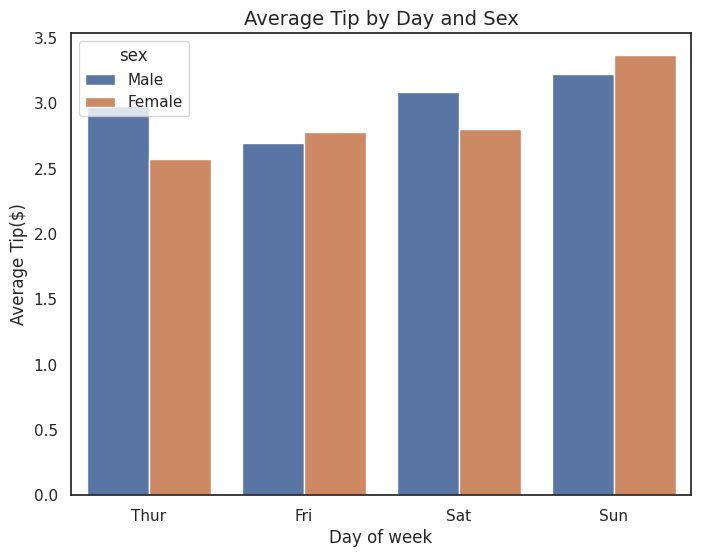

In [ ]:
df = sns.load_dataset('tips')

sns.barplot(
    data = df,
    x = 'day',
    y = 'tip',
    estimator = 'mean',
    hue = 'sex',
    ci = None
)

plt.title('Average Tip by Day and Sex',fontsize = 14)
plt.xlabel('Day of week')
plt.ylabel('Average Tip($)')
plt.legend(title = 'sex')
plt.show()

**문제 2**  
`titanic` 데이터에서 `class`와 `survived` 간의 관계를  
모자이크 플롯(Mosaic Plot)으로 시각화하세요.

/tmp/ipython-input-4113845855.py:9: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.



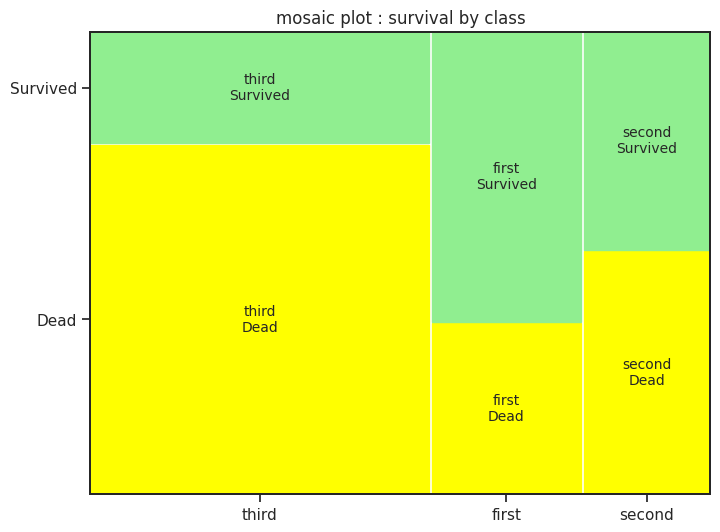

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

df = sns.load_dataset('titanic')

df = df.replace({'survived': {0: 'Dead', 1: 'Survived'}})
df = df.replace({'class': {'Third': 'third', 'First': 'first','Second':'second'}})

def props(key):
    # key는 ('Male', 'Survived') 형태의 튜플로 전달됨
    return {'color': 'lightgreen' if 'Survived' in key else 'yellow'}

mosaic(
    data = df,
    index = ['class','survived'],
    properties = props,
    title = 'mosaic plot : survival by class'
)

plt.show()

**문제 3**  
`flights` 원본 데이터 셋을 `month`와 `year` 기준으로 피벗(pivot)하여  
`passengers`의 값을 색상으로 표현하는 히트맵을 작성하세요.

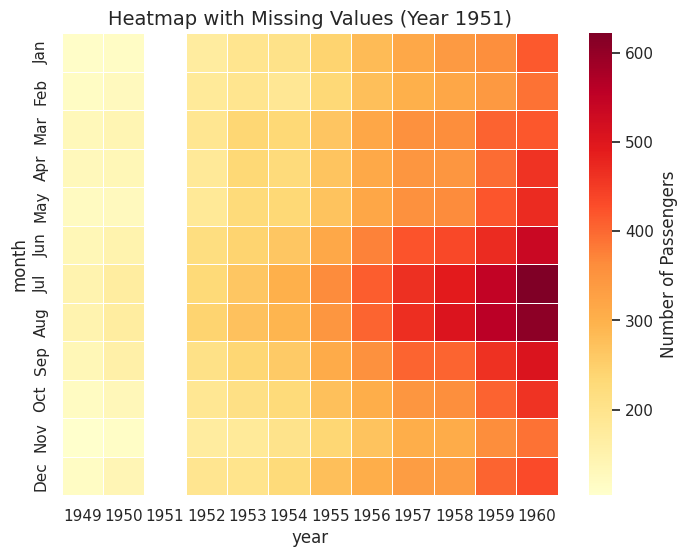

In [ ]:
flights = sns.load_dataset('flights')
flights.loc[flights['year'] == 1951, 'passengers'] = None

pivot_missing = flights.pivot(
    index='month',
    columns='year',
    values='passengers'
)

sns.set_theme(style="white", rc={"figure.figsize": (8, 6)})

sns.heatmap(
    data=pivot_missing,
    cmap='YlOrRd',                 # 노랑~빨강 색상 팔레트
    linewidths=0.5,                # 셀 구분선
    mask=pivot_missing.isna(),     # 결측치는 표시하지 않음 (하얗게 처리)
    cbar_kws={'label': 'Number of Passengers'}  # 컬러바 라벨
).set_title('Heatmap with Missing Values (Year 1951)', fontsize=14)

plt.show()

**문제 4**  
학생별 성적 데이터를 이용해 Radar Chart로 각 학생의 강점과 약점을 비교하세요.  
평균(AVG)과 한 학생(예: Tom)의 성적을 비교하여 시각적으로 나타내보세요.

In [ ]:
df = pd.DataFrame({
    'Kor': [72, 70, 90, 60, 66],
    'Eng': [84, 85, 95, 70, 85],
    'Math': [71, 40, 88, 80, 75],
    'Sci': [83, 80, 91, 90, 70],
    'PE': [60, 60, 60, 70, 50]
}, index=['AVG', 'John', 'Tom', 'Smith', 'Grace'])

In [ ]:
def draw_radar(df, title):
    categories = df.columns.tolist()
    categories += categories[:1]  # 첫 항목 반복 → 도형 닫기

    fig = go.Figure()

    # 각 학생(행)에 대해 하나의 다각형 생성
    for idx in df.index:
        values = df.loc[idx].tolist()
        values += values[:1]
        fig.add_trace(go.Scatterpolar(
            r=values,
            theta=categories,
            fill='toself',
            name=idx
        ))

    fig.update_layout(
        polar=dict(radialaxis=dict(visible=True, range=[0, 100])),
        showlegend=True,
        width=700, height=700,
        title_text=title,
        title_x=0.5
    )

    fig.show()

In [ ]:
draw_radar(df.loc[['AVG', 'Tom']], 'Radar Chart: AVG vs Tom')